### Machine Learning 11

In this assignment students have to make ARIMA model over shampoo sales  data and check the MSE between predicted and 
actual value.


Student can download data in .csv format from the following link: https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

sales = pd.read_csv("sales.csv",index_col =0, parse_dates=[0],date_parser = parser)

            Sales of shampoo over a three year period
Month                                                
1901-01-01                                      266.0
1901-02-01                                      145.9
1901-03-01                                      183.1
1901-04-01                                      119.3
1901-05-01                                      180.3


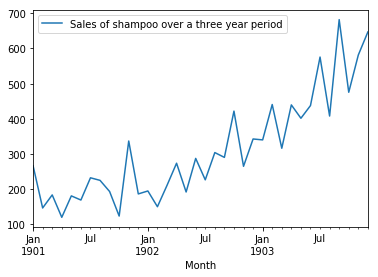

In [3]:
print(sales.head())
sales.plot()
plt.show()

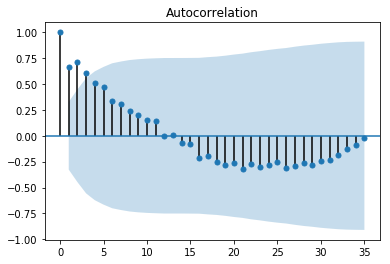

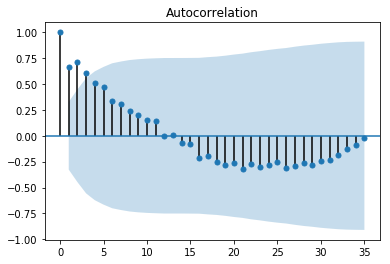

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

#### Converting series to stationary

In [5]:
sales.head()

,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [6]:
sales.shift(1)

,Sales of shampoo over a three year period
Month,
1901-01-01,NaN
1901-02-01,266.0
1901-03-01,145.9
1901-04-01,183.1
1901-05-01,119.3
1901-06-01,180.3
1901-07-01,168.5
1901-08-01,231.8
1901-09-01,224.5


In [7]:
from statsmodels.tsa.arima_model import ARIMA

In [8]:
import warnings
warnings.filterwarnings('ignore')
# fit model
model = ARIMA(sales, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.aic)
print(model_fit.summary())

406.33987702440857
                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Wed, 16 Oct 2019   AIC                            406.340
Time:                                                 18:59:30   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [9]:
predictions = model_fit.forecast(steps=8)[0]
print(predictions)

[564.21353606 675.40652616 577.12706846 689.55758089 641.86599763
 673.05871291 691.39610918 679.40230941]


In [10]:
X = sales.values
print(X)

[[266. ]
 [145.9]
 [183.1]
 [119.3]
 [180.3]
 [168.5]
 [231.8]
 [224.5]
 [192.8]
 [122.9]
 [336.5]
 [185.9]
 [194.3]
 [149.5]
 [210.1]
 [273.3]
 [191.4]
 [287. ]
 [226. ]
 [303.6]
 [289.9]
 [421.6]
 [264.5]
 [342.3]
 [339.7]
 [440.4]
 [315.9]
 [439.3]
 [401.3]
 [437.4]
 [575.5]
 [407.6]
 [682. ]
 [475.3]
 [581.3]
 [646.9]]


In [11]:
size = int(len(X) * 0.66)

In [12]:
train, test = X[0:size], X[size:len(X)]


In [13]:
history = [x for x in train]

In [14]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 6958.324


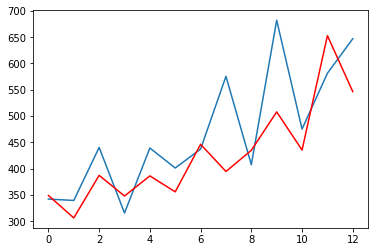

In [15]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

6958.324007490383